In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
df.shape

(3829, 5)

In [4]:
# Create dataframe with all control records 
control_df = df.query('group == "control"')

# Compute completion rate 
control_cr = control_df.query('completed == True').shape[0]/control_df.shape[0]

# Display completaion reate 
control_cr

0.3719951923076923

In [5]:
# Create dataframe with all experiment records 
exp_df = df.query('group == "experiment"')

#compute completion rate 
exp_cr = exp_df.query('completed == True').shape[0]/ exp_df.shape[0]

# display complettion rate 
exp_cr

0.3935334872979215

In [6]:
# Compute observed difference in completion rates 
obs_diff = exp_cr - control_cr
obs_diff

0.02153829499022919

In [13]:
# create sampling distribution for difference in completion rates 
# with bootstrapping 
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    exp_df = b_samp.query('group == "experiment"')
    
    control_cr = control_df.query('completed == True').shape[0]/control_df.shape[0]
    exp_cr = exp_df.query('completed == True').shape[0]/exp_df.shape[0]
    
    diffs.append(exp_cr - control_cr)
    

In [14]:
# convert to numpy array 
diffs = np.array(diffs)

(array([   8.,   31.,  336., 1293., 2516., 3022., 1989.,  659.,  127.,
          19.]),
 array([-0.04356597, -0.03118955, -0.01881314, -0.00643673,  0.00593969,
         0.0183161 ,  0.03069251,  0.04306893,  0.05544534,  0.06782175,
         0.08019816]),
 <BarContainer object of 10 artists>)

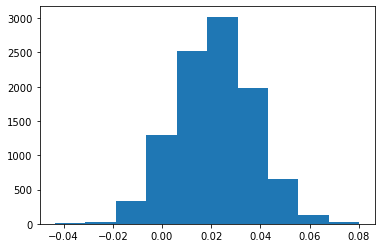

In [15]:
# plot distribution 
plt.hist(diffs)

In [16]:
# create distribution under the null hypothesis 
null_vals = np.random.normal(0, diffs.std(), diffs.size)


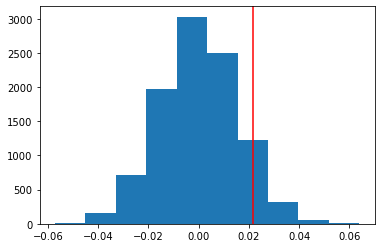

In [17]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [18]:
#compute p-value
(null_vals > obs_diff).mean()

0.0821